In [2]:
'''
#### these modules are required to run the script
module use /g/data/hh5/public/modules
module load conda/analysis3
source /scratch/nf33/public/hackathon_env/bin/activate
'''

import xarray as xr
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs
%run ~/hackathon-2025_project/hk25-AusNode-land/analysis/yll_functions.ipynb

In [3]:

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'PT3H'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

'''
#### some variables of interest ####

hflsd: latent heat flux
hfssd: sensible heat flux
huss: specific humidity in 2m
mrso: Water content of soil layers
orog: surface altitude
pr: precipitation flux
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rsus: surface upwelling shortwave radiation
sftlf: cell area fraction occupied by land including lakes
tas: temperature in 2m
tauu: u-momentum flux at the surface
tauv: v-momentum flux at the surface
ts: surface temperature
uas: zonal wind in 10m
vas: meridional wind in 10m
'''


/home/561/yl1269/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/561/yl1269/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
hflsd: latent heat flux
hfssd: sensible heat flux
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rsdt: toa incident shortwave radiation
rsus: surface upwelling shortwave radiation
rsuscs: surface upwelling clear-sky shortwave radiation
rsut: toa outgoing shortwave radiation
rsutcs: toa outgoing clear-sky shortwave radiation
sftgif: cell area fraction occupied by land ice
sftlf: cell ar

'\n#### some variables of interest ####\n\nhflsd: latent heat flux\nhfssd: sensible heat flux\nhuss: specific humidity in 2m\nmrso: Water content of soil layers\norog: surface altitude\npr: precipitation flux\nrlds: surface downwelling longwave radiation\nrldscs: surface downwelling clear-sky longwave radiation\nrlus: surface upwelling longwave radiation\nrsds: surface downwelling shortwave radiation\nrsdscs: surface downwelling clear-sky shortwave radiation\nrsus: surface upwelling shortwave radiation\nsftlf: cell area fraction occupied by land including lakes\ntas: temperature in 2m\ntauu: u-momentum flux at the surface\ntauv: v-momentum flux at the surface\nts: surface temperature\nuas: zonal wind in 10m\nvas: meridional wind in 10m\n'

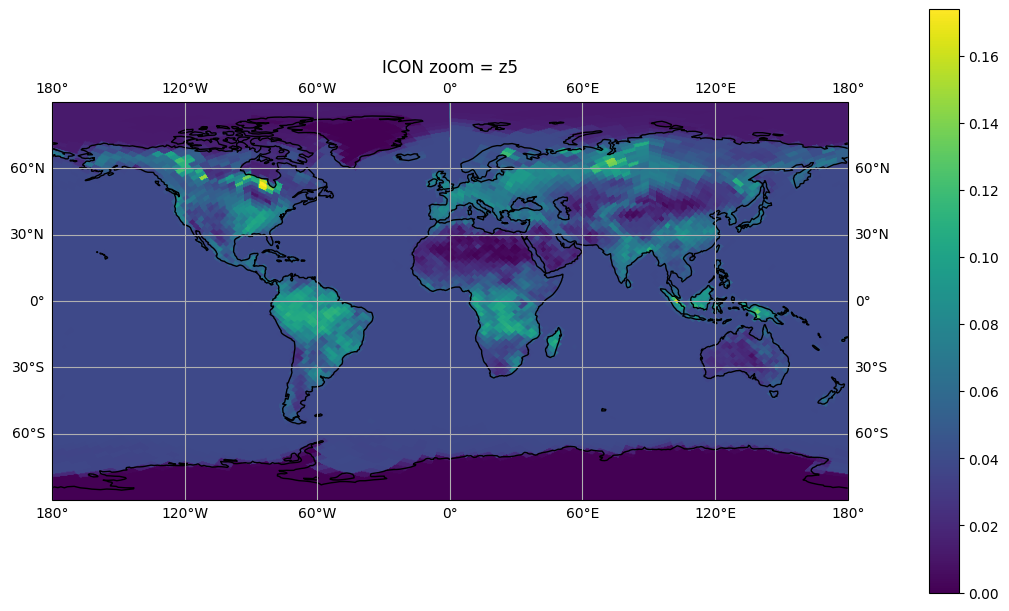

In [7]:

# choose a variable to plot
da = ds['mrso']

# test plot some data
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

data = da.isel(time=20, soil_level=1)
ax.set_global()
im = egh.healpix_show(data.values,ax=ax)
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


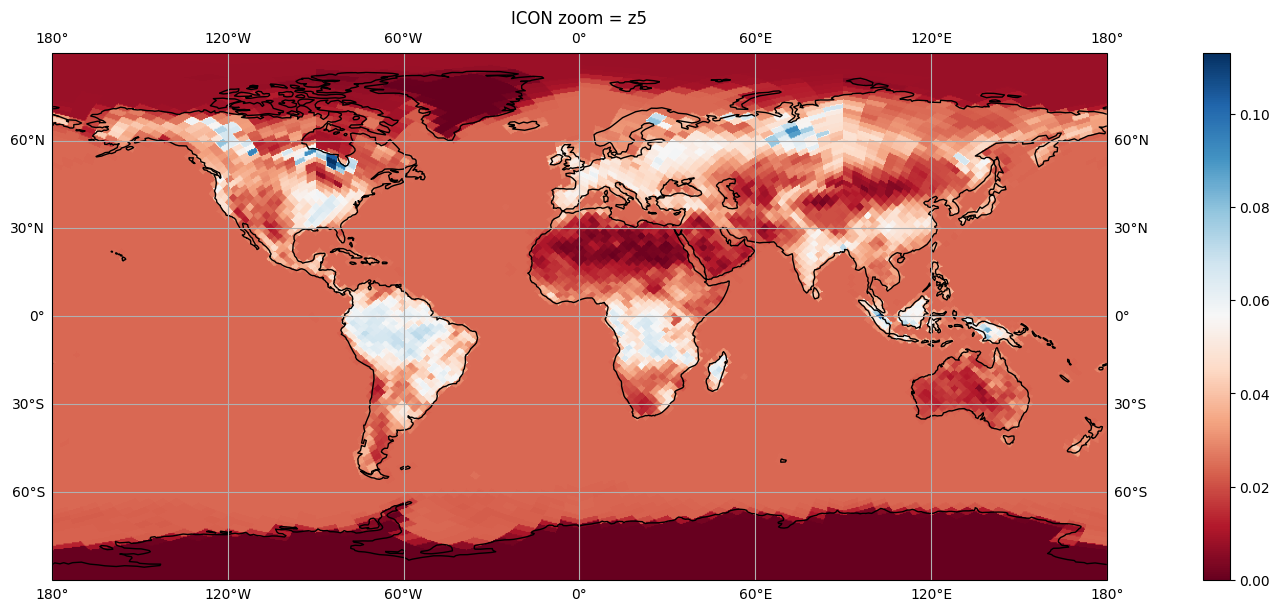

In [13]:
diff = da.isel(time=20, soil_level=0)-da.isel(time=20, soil_level=1)
mean = da.isel(time=20, soil_level=[0,1]).mean(dim='soil_level')

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

data = da.isel(time=20, soil_level=1)
ax.set_global()
im = egh.healpix_show(mean.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


In [7]:
import numpy as np
import pandas as pd

def corr_window(x, y, window_x=9, window_y=9, method='pearson'):
    """
    Computes the correlation between two time series using moving average smoothing.

    Parameters:
        x (array-like): First input time series.
        y (array-like): Second input time series.
        window_x (int): Moving average window for x.
        window_y (int): Moving average window for y.
        method (str): Correlation method - 'pearson', 'spearman', or 'kendall'.

    Returns:
        float: Correlation coefficient between the smoothed x and y.
    """
    x = pd.Series(x).rolling(window=window_x, center=True).mean()
    y = pd.Series(y).rolling(window=window_y, center=True).mean()

    # Drop NaNs introduced by rolling
    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    if len(x_valid) == 0:
        raise ValueError("No overlapping non-NaN values after smoothing. Try smaller windows.")

    return x_valid.corr(y_valid, method=method)

Correlation: -0.11865176215746628
